<a href="https://colab.research.google.com/github/Komsomolochka/open_data_battle_2021/blob/main/paris/paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
#данная строчка нужна для корректного отображения графиков
%matplotlib inline 

In [6]:
#загружаем файл
df = pd.read_csv('/content/ParisHousing.csv', index_col=0)

In [3]:
df

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,75523,three,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,80771,thirty-nine,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,55712,fifty-eight,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard
3,32316,forty-seven,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,Basic,no pool and no yard
4,70429,nineteen,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,Luxury,has pool and has yard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,eighty-nine,5,73133,7,6,2009,False,True,9311,1698,218,False,4,176425.9,Basic,has pool and no yard
9996,44403,twenty-nine,12,34606,9,4,1990,False,True,9061,1742,230,False,0,4448474.0,Basic,has pool and has yard
9997,83841,three,69,80933,10,10,2005,True,True,8304,7730,345,True,9,8390030.5,Basic,no pool and no yard
9998,59036,seventy,96,55856,1,3,2010,False,True,2590,6174,339,True,4,5905107.0,Basic,no pool and no yard


In [7]:
#создаем бинарные признаки, удаляем ранговый столбец 'numberOfRooms'
del df['numberOfRooms']
df['buildisnew'] = np.where(df['isNewBuilt']==True, 1, 0)
del df['isNewBuilt']
df['StormProtector'] = np.where(df['hasStormProtector']==True, 1,0)
del df['hasStormProtector']
df['StorageRoom'] = np.where(df['hasStorageRoom']==True, 1,0)
del df['hasStorageRoom']
df['Category'] = np.where(df['category']=='Luxury', 1,0)
del df['category']

In [8]:
#разбиваем столбец 'PoolAndYard' на два бинарных признака
df[['pool','yard']] = df['PoolAndYard'].str.split(' and ', expand=True)
del df['PoolAndYard']
df['Pool'] = np.where(df['pool']=='has pool', 1,0)
df['Yard'] = np.where(df['yard']=='has yard', 1,0)
del df['pool']
del df['yard']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   squareMeters    10000 non-null  int64  
 1   floors          10000 non-null  int64  
 2   cityCode        10000 non-null  int64  
 3   cityPartRange   10000 non-null  int64  
 4   numPrevOwners   10000 non-null  int64  
 5   made            10000 non-null  int64  
 6   basement        10000 non-null  int64  
 7   attic           10000 non-null  int64  
 8   garage          10000 non-null  int64  
 9   hasGuestRoom    10000 non-null  int64  
 10  price           10000 non-null  float64
 11  buildisnew      10000 non-null  int64  
 12  StormProtector  10000 non-null  int64  
 13  StorageRoom     10000 non-null  int64  
 14  Category        10000 non-null  int64  
 15  Pool            10000 non-null  int64  
 16  Yard            10000 non-null  int64  
dtypes: float64(1), int64(16)
memory 

In [10]:
df.describe()

,squareMeters,floors,cityCode,cityPartRange,numPrevOwners,made,basement,attic,garage,hasGuestRoom,price,buildisnew,StormProtector,StorageRoom,Category,Pool,Yard
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49870.13120,50.276300,50225.486100,5.510100,5.521700,2005.48850,5033.103900,5028.01060,553.12120,4.99460,4.993448e+06,0.499100,0.499900,0.503000,0.126500,0.496800,0.508700
std,28774.37535,28.889171,29006.675799,2.872024,2.856667,9.30809,2876.729545,2894.33221,262.05017,3.17641,2.877424e+06,0.500024,0.500025,0.500016,0.332429,0.500015,0.499949
min,89.00000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.00000,1.031350e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25098.50000,25.000000,24693.750000,3.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,2.00000,2.516402e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50105.50000,50.000000,50693.000000,5.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,5.00000,5.016180e+06,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,74609.75000,76.000000,75683.250000,8.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,8.00000,7.469092e+06,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,99999.00000,100.000000,99953.000000,10.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,10.00000,1.000677e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
col = df.columns

In [12]:
#заменяем пустые значения нулями
df[col].fillna(0, inplace=True)

In [ ]:
#матрица корреляций
df.corr()

,squareMeters,floors,cityCode,cityPartRange,numPrevOwners,made,basement,attic,garage,hasGuestRoom,price,buildisnew,StormProtector,StorageRoom,Category,Pool,Yard
squareMeters,1.000000,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.003960,-0.000588,-0.017246,-0.000623,0.999999,-0.010667,0.007480,-0.003486,-0.011800,-0.005594,-0.006650
floors,0.001109,1.000000,0.002207,-0.004921,0.002463,0.005022,0.006228,-0.000270,0.011303,-0.021155,0.001654,0.002458,-0.008566,0.003616,-0.003827,-0.004006,-0.000883
cityCode,-0.001541,0.002207,1.000000,0.011334,-0.007549,0.009266,0.002652,-0.002019,-0.002208,-0.003338,-0.001539,-0.000224,-0.004941,0.002554,0.003950,0.008072,0.006760
cityPartRange,0.008758,-0.004921,0.011334,1.000000,0.009238,0.007748,0.004743,0.010696,-0.001648,-0.007153,0.008813,-0.001874,0.005224,-0.011338,-0.003171,0.014613,0.005023
numPrevOwners,0.016619,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.000862,0.000719,0.020268,-0.006082,0.016619,-0.017420,0.002522,0.031707,-0.012843,-0.006848,0.004279
made,-0.007207,0.005022,0.009266,0.007748,0.006858,1.000000,-0.005506,0.013773,0.005687,-0.005431,-0.007210,-0.001678,-0.000645,-0.007868,0.005399,0.001894,0.002214
basement,-0.003960,0.006228,0.002652,0.004743,-0.000862,-0.005506,1.000000,-0.003180,0.000117,-0.020732,-0.003967,-0.015986,-0.005001,-0.010815,-0.011310,-0.007268,-0.008558
attic,-0.000588,-0.000270,-0.002019,0.010696,0.000719,0.013773,-0.003180,1.000000,-0.000611,-0.011995,-0.000600,0.020127,-0.003753,-0.000789,-0.005729,-0.011901,-0.003085
garage,-0.017246,0.011303,-0.002208,-0.001648,0.020268,0.005687,0.000117,-0.000611,1.000000,-0.017316,-0.017229,0.002749,0.003758,0.032863,-0.002218,0.004832,-0.004626
hasGuestRoom,-0.000623,-0.021155,-0.003338,-0.007153,-0.006082,-0.005431,-0.020732,-0.011995,-0.017316,1.000000,-0.000644,0.019895,-0.006549,0.015186,0.003110,0.001123,-0.007276


In [22]:
#нормируем данные
scaler = preprocessing.MinMaxScaler()

names = df.columns
d = scaler.fit_transform(df)

scaled_df = pd.DataFrame(d, columns=col)
scaled_df.head()

,squareMeters,floors,cityCode,cityPartRange,numPrevOwners,made,basement,attic,garage,hasGuestRoom,price,buildisnew,StormProtector,StorageRoom,Category,Pool,Yard
0,0.755020,0.626263,0.093747,0.222222,0.777778,0.483871,0.4313,0.900490,0.951111,0.7,0.755144,0.0,1.0,0.0,0.0,1.0,0.0
1,0.807547,0.979798,0.393977,0.777778,0.555556,0.806452,0.3653,0.243524,0.031111,0.2,0.807854,1.0,0.0,1.0,1.0,1.0,1.0
2,0.556731,0.181818,0.344712,0.555556,0.777778,1.000000,0.2937,0.885189,0.038889,0.9,0.556630,0.0,0.0,1.0,0.0,1.0,0.0
3,0.322560,0.050505,0.279500,1.000000,0.333333,0.709677,0.0659,0.714071,0.287778,0.3,0.322339,0.0,1.0,0.0,0.0,0.0,0.0
4,0.704034,0.898990,0.380610,0.222222,0.666667,0.000000,0.8435,0.242824,0.213333,0.4,0.704723,1.0,0.0,1.0,1.0,1.0,1.0


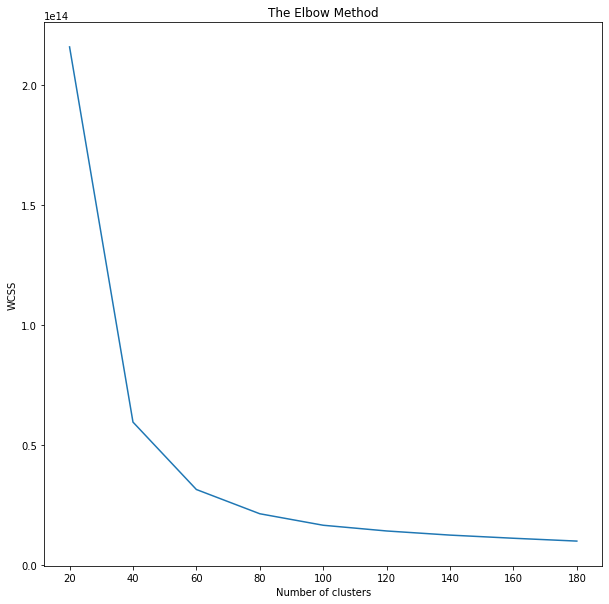

In [24]:
#применяем KMeans
wcss = []
for i in range(20,200,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(20,200,20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

*Ответ: 40*